#  로지스틱 회귀: 시험 합격 확률 
- 로지스틱 회귀 개념
- 공부한 시간과 합격할 확률 관계
- 분류 확률 predict_proba() 이해
- 소프트맥스 함수 이해


## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

## 공부한 시간
- 합격자, 불합격자의 공부한 시간 데이터 : X1

In [2]:
## 합격자, 불합격자의 공부한 시간 데이터

pass_time = [6,7,9.5,10,11,11.5,12,13,14,14.5,16,16.5,17,19]
fail_time = [2,2.6,3,3.2,3.6,4,5,5.2,6,7,8,9]

print('합격자수, 불합격자수: ', len(pass_time), len(fail_time))
study_time = np.concatenate((pass_time, fail_time))

# 합격자, 불합격자 데이터프레임
df = pd.DataFrame(study_time, columns=['study_time'])
df['pass'] = [1]*len(pass_time) + [0]*len(fail_time)
print(df.shape)
df[:5]

합격자수, 불합격자수:  14 12
(26, 2)


,study_time,pass
0,6.0,1
1,7.0,1
2,9.5,1
3,10.0,1
4,11.0,1


## 산포도

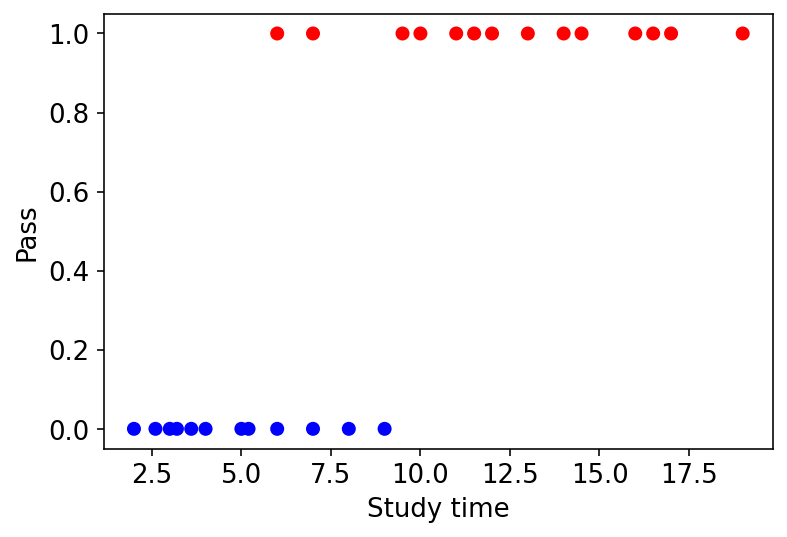

In [3]:
## 합격자, 불합격자의 산포도 보기

plt.scatter(df['study_time'], df['pass'], c=df['pass'], cmap='bwr')
plt.xlabel("Study time")
plt.ylabel("Pass")
plt.show()

## 시그모이드 함수
- 로지스틱 회귀모델은 시그모이드 함수로 모델링한다 (선형 모델은 직선을 사용)
- "회귀"모델이지만 확률을 예측하므로 분류에서 주로 사용된다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.11.56.png?raw=1" align='left'  width=400>

## 확률 p인 사건의 가치 (score)

- $log$(${1}\over{p}$) = $log$(1 + $e ^ {-s}$) $\propto$ $log$($e ^ {-s}$) = $-s$
- 확률 $p$ $\propto$ $e ^ {s}$
- 즉, 선형적인 값(score)과 확률(p)의 관계는 로그와 exp 의 관계이다

## 시그모이드 함수의 특성

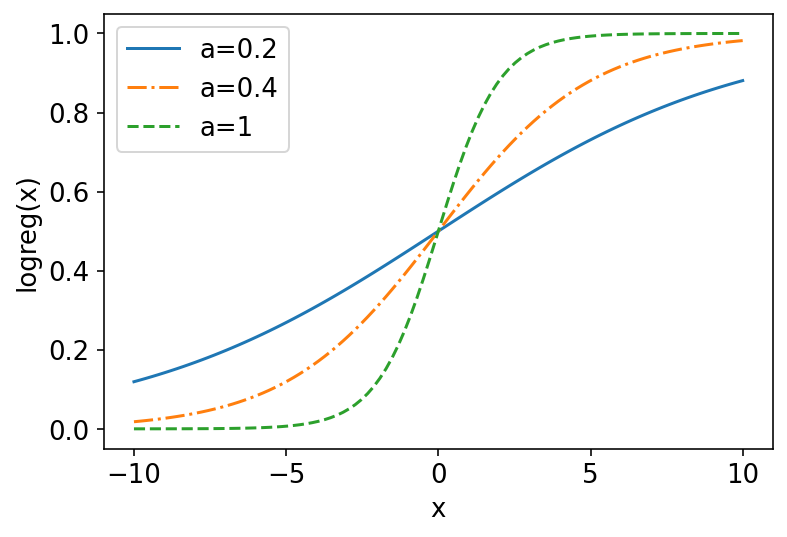

In [4]:
## 시그모이드 함수의 특성 (가중치와 절편)

# 시그모이드 함수 계산
def logreg(s):
    return 1 /(1+np.exp(-s)) 

# 여러가지 a 값의 차이 보기
xs = np.linspace(-10, 10, 100)

b = 0
plt.plot(xs, logreg(0.2*xs + b), label='a=0.2', ls='-')
plt.plot(xs, logreg(0.4*xs + b), label='a=0.4', ls='-.')
plt.plot(xs, logreg(1*xs + b), label='a=1', ls='--')
plt.xlabel("x")
plt.ylabel("logreg(x)")

plt.legend()

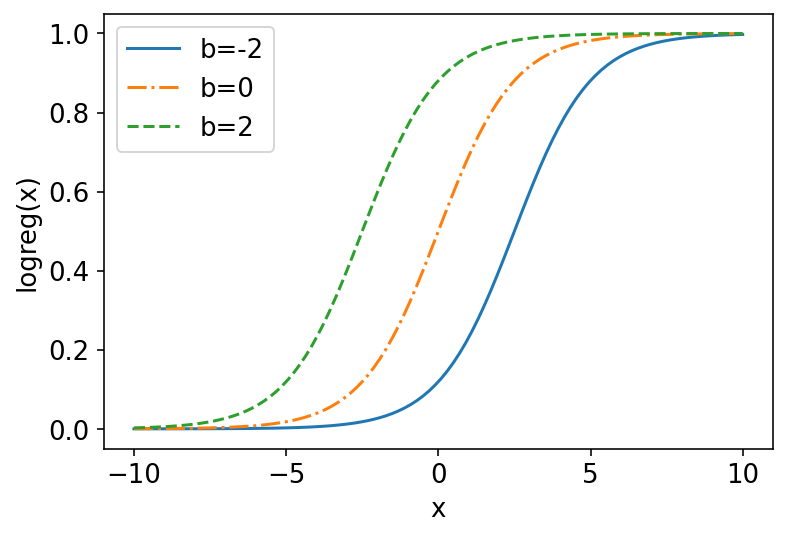

In [5]:
## 여러가지 b 값의 차이 보기

xs = np.linspace(-10, 10, 100)

a = 0.8
plt.plot(xs, logreg(a*xs -2), label='b=-2', ls='-')
plt.plot(xs, logreg(a*xs + 0), label='b=0', ls='-.')
plt.plot(xs, logreg(a*xs + 2), label='b=2', ls='--')
plt.xlabel("x")
plt.ylabel("logreg(x)")

plt.legend()

## 모델 결과

a, b =  0.7535393323398046 -5.963814446471741


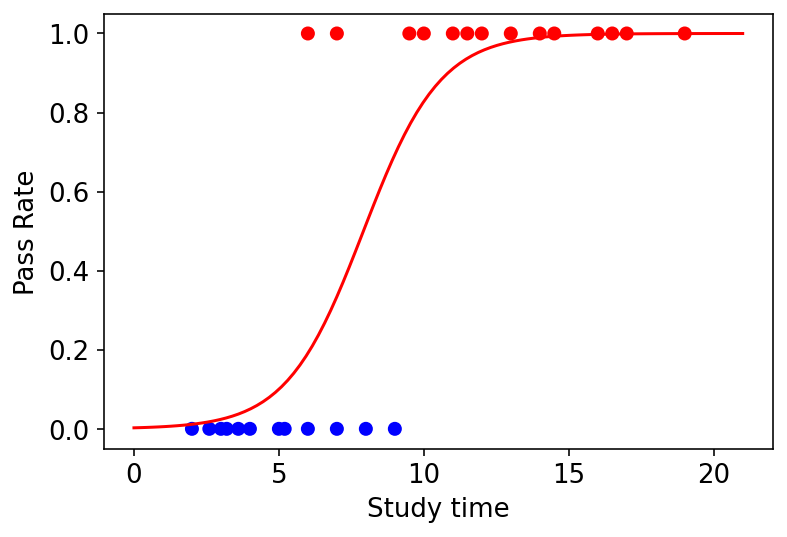

In [6]:
## 로지스틱 회귀 모델로 합격 예측하기

X = df[['study_time']]
y = df['pass']

model = LogisticRegression() 
model.fit(X,y) 

a, b = model.coef_[0][0], model.intercept_[0]
print('a, b = ', a, b)
plt.xlabel("Study time")
plt.ylabel("Pass Rate")
plt.scatter(df['study_time'], df['pass'], c=df['pass'], cmap='bwr')

# 로지스틱 회귀 모델
xs = np.linspace(0,21,100)
ys = logreg(a*xs + b) 
plt.plot(xs, ys, c='r')
plt.show()

- 모델 사용

In [7]:
## 공부시간에 따른 합격 여부 예측

# 임의의 공부 시간
X_test = [[4],[5],[6],[7],[8],[9],[10],[11],[12]]

print('합격 예측')
print(model.predict(X_test)) # (3) 모델 사용
print('합격할 확률')
proba_pass = model.predict_proba(X_test)[:,1]
print(proba_pass .round(2))
model.predict_proba(X_test).round(2)[:5]

합격 예측
[0 0 0 0 1 1 1 1 1]
합격할 확률
[0.05 0.1  0.19 0.33 0.52 0.69 0.83 0.91 0.96]


array([[0.95, 0.05],
       [0.9 , 0.1 ],
       [0.81, 0.19],
       [0.67, 0.33],
       [0.48, 0.52]])

In [8]:
## 분류 경계값(확률)을 조정하여 정밀도, 재현율을 변경

print('기본 모델의 예측 (p > 0.5)')
print((model.predict_proba(X_test)[:,1] > 0.5)*1)
print('정밀도를 높인 모델의 예측 (p > 0.7)')
print((model.predict_proba(X_test)[:,1] > 0.7)*1)
print('재현율을 높인 모델의 예측 (p > 0.3)')
print((model.predict_proba(X_test)[:,1] > 0.3)*1)

기본 모델의 예측 (p > 0.5)
[0 0 0 0 1 1 1 1 1]
정밀도를 높인 모델의 예측 (p > 0.7)
[0 0 0 0 0 0 1 1 1]
재현율을 높인 모델의 예측 (p > 0.3)
[0 0 0 1 1 1 1 1 1]


## 분류 확률
- 로지스틱 회귀는 이진 분류 예측을 하며 분류 확률값을 제공한다
- predict_proba() 사용
- 참고로 선형계열 모델에서는 decision_function()으로 점수를 제공했다

# 소프트맥스

- 로지스틱 회귀 모델은 이진 분류만 가능하다
- 3개 이상의 분류에 로지스틱 회귀 방법 (시그모이드 함수 매핑)을 적용할 때 소프트맥스 기법을 사용한다
- 다항 로지스틱스라고도 한다
- 분류 모델이 계산으로 얻은 선형적인 값을 확률 값으로 매핑하는데 소프트맥스가 널리 사용된다.


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.25.18.png?raw=1" align='left'  width=400>

In [9]:
## 소프트맥스 구현(계산식) 

def get_softmax(scores):
    prob = np.exp(np.array(score))
    return prob/prob.sum()

scores = [[1,2,3], [7,8,9],[-4, -3, -2], [3,4,5,6,7]] 
for score in scores:
    prob = get_softmax(score)
    print(prob.round(3))

[0.09  0.245 0.665]
[0.09  0.245 0.665]
[0.09  0.245 0.665]
[0.012 0.032 0.086 0.234 0.636]
